In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [8]:
# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [16]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Basic statistics
print("\nDataset Description:\n", df.describe())

Missing Values:
 Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

Dataset Description:
                 Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.894933   
min        5.000000     17.000000        0.000000      3.000000      1.000000   
25%        9.000000     22.000000        1.000000      7.000000      1.000000   
50%       14.000000     22.000000        2.000000     13.000000      1.000000   
75%       19.000000     23.000000        2.000000     17.000000      1.000000   
max       23.000000     23.000000        3.0000

In [9]:
# Select features
X = df[['MonthlyHours', 'ElectricityBill']].values

In [10]:
# ELBOW METHOD to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

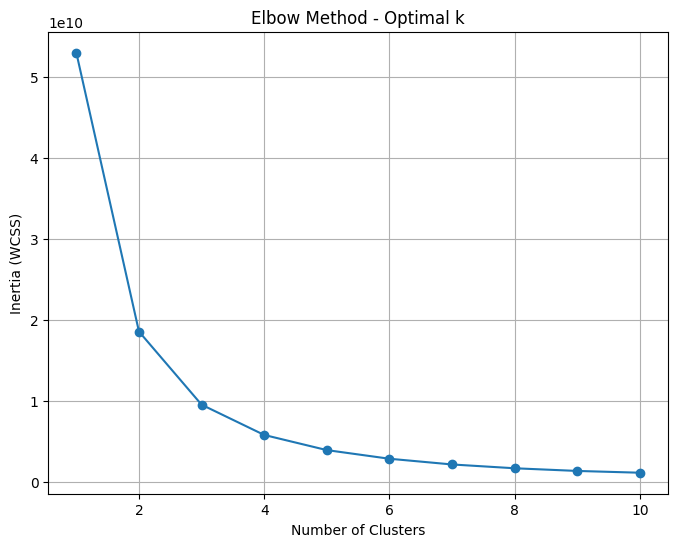

In [11]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

In [12]:
# CHOOSE k based on the elbow (for example: 3)
k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

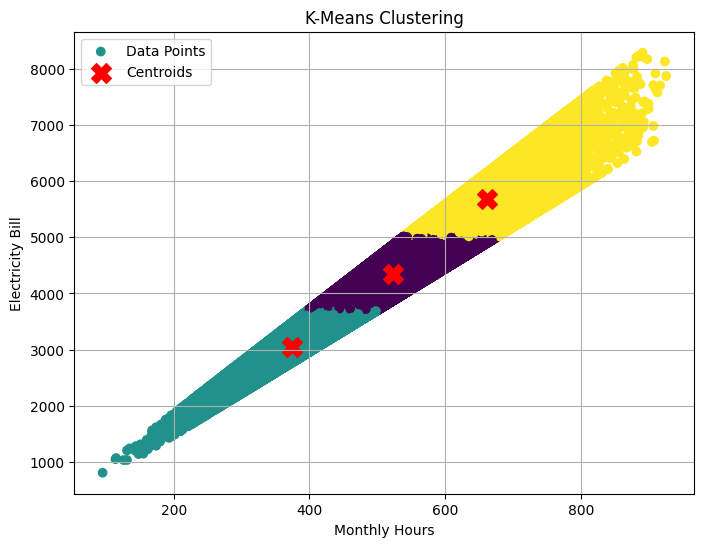

In [13]:
# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Print cluster centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 522.62094591 4342.18673655]
 [ 373.82189715 3054.4003544 ]
 [ 661.31307378 5676.71881163]]


In [15]:
# Evaluation Metrics
print("\nEvaluation Metrics for K-Means Clustering")
print("------------------------------------------")
print("Inertia (WCSS):", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X, labels))
print("Davies-Bouldin Score:", davies_bouldin_score(X, labels))


Evaluation Metrics for K-Means Clustering
------------------------------------------
Inertia (WCSS): 9553086176.219906
Silhouette Score: 0.5289073896157079
Davies-Bouldin Score: 0.5647510808772878
